In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import pickle
import keras
import warnings
warnings.filterwarnings("ignore")
import tqdm as notebook_tqdm
sns.set()

# **Getting Started [1]**

We will be using the `keras` API in the implementation of the CNN model

We referred to jsantos's GitHub page for an introduction to CNN. We referenced the parameters used in their model as a starting point, and for the sake of testing out the model.

## **Deep Learning [2]**

Deep learning is an approach in machine learning that involves multiple layers of hidden layers within an artificial neural network in making decisions. These network are made of nodes called neurons, since the model drew inspiration to how our brain work. There are three layers to the neural network:

- **Input layer**
- **Hidden layer**
- **Output layer**

In the input layer, standardised / normalised inputs are assigned some random weights to see which parameters are more important in determining the output. These individual weights are adjusted through learning processes including gradient descent and backprogration. After which, we passed the product of the weights and inputs to the neurons and obtain the sum of products.

Then, bias is introduced to the weighted sum to improve the performance of model. The resultant sum is then passed into a activation function which decides if the neuron would be activated in passing the signal forward. A common activation function is ReLu (Rectified Linear Unit), which returns output transparent if it is positive, and 0 otherwise.

Finally, in the output layer, the resultant output learnt from those hidden layers are returned. In our case, these values will be categorical.

## **What is a CNN [3]**

Convolutional neural network (CNN) is a common neural network used in tasks such as image classifications. Its name is derived from the convolution step. It consists of three fundamental layers
- Convolutional Layers
- Pooling Layers
- Fully Connected Layers

In the convolution layer, a dot product between filter values from tile-like filters deployed and image piel values are calculated. This forms a matrix called feature map. Each element from one tensor is multiplied by second tensor (kernel value) and summed.  

In the pooling layer, the dimensionality of the inputs are reduced and a filter is passed. However, in this case the pooling filters do not posses any weights.

In the fully connected layer (**dense layer**), neurons from the previous and subsequent layers are connected, and take the falttened feature maps from the convoluntional and pooling layer as input.

## **Reference**
[1] J. F. Santos, “jfsantos/keras-tutorial,” *GitHub*, Jan. 04, 2024. https://github.com/jfsantos/keras-tutorial  
[2] Umer, A. (2023a, June 23). Deep Learning Essentials  - CodeX - Medium. *Medium*. https://medium.com/codex/deep-learning-essentials-9cce7a911326  
[3] Umer, A. (2023c, August 9). Understanding Convolutional Neural Networks: A Beginner’s Journey into the Architecture. *Medium*. https://medium.com/codex/understanding-convolutional-neural-networks-a-beginners-journey-into-the-architecture-aab30dface10

# **Loading of Data**

We have already extraced, processed, and augmented the data that we need and saved them as `.npy` files. We then proceed to use `numpy` to load them.

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

In [6]:
X_train_norm = np.load("X_train_norm.npy")
X_test_norm = np.load("X_test_norm.npy")

y_train_encoded = np.load("y_train_encoded.npy")
y_test_encoded = np.load("y_test_encoded.npy")

# **CNN Parameters**

## Model

`keras` gives the option either the `Sequential()` class or functional `Model()` class.

- **Sequential**: it implements a linear stack of layers
- **Model**: gives flexibility in using the functional API to customise model's forward pass

For simplicity sake, we will use the `Sequential()` class. We specify the input shape (496, 369, 4), which is the shape of our image as it is RGB-A


## Output Layer
There are many activation functions available. We used the `softmax` layer so that we determine the classification using probabilities, which is more suitable for our task. We passed 88 nodes, which is completely arbitrarily and is referenced from the Santos' GitHub page as a starting point. The creation of layers is done by `keras.layer.add()`

## Filters

The hyperparameters for the `Conv2D`, `MaxPooling2D` and output `Dense` layers are completely arbitrary and we merely referenced Santos' GitHub page for a start. We specified `Conv2D` to have **32** filters and filter size as **3x3**. We specified the pooling window to be **2x2**. 

While these values are referenced from the GitHub page, they are in fact, rather common values.

## Hidden Layer

The parameters for the hidden layer is completely arbitrary. We use the `relu` activation function for simplicity. We referenced the parameters 1024 nodes, which is also a common value.

## Activation Function
There are many activation functions to choose from, such as the `sigmoid` and `softmax` function. For simplicity sake, we will use `relu`, which is the rectified linear unit activation, only allowing positive values.

## Optimiser
There are many optimisers vailable, such as `SGD`, `RMSprop` etc. For simplicity sake, we will use the default `Adam` optimiser. According to the documentation, *"Adam optimisation is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments."*

## Loss Function
There are many loss functions available, such as `poisson` and `kl_divergence`. Because we are doing a mutli-class classification and we have specified the output layer as `softmax`, we will be using the `categorical_crossentropy` function. According to the documentation, this function *"computes the crossentropy loss between the labels and predictions."*, and is suitable when there are two or more label classes.

Additionally, according to the documentation, this function **requires** the label to be **one-hot encoded**, which is exactly what we have done previously for the sake of accuracy. If one-hot encoding is not done, then we will need to use the `SparseCategoricalCrossentropy` loss.

## Metrics
Because this is a classification problem, and because of the way we passed the inputs, we will be using the `accuracy` metrics, which calculate how often predictions equal labels.

In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(496, 369, 4)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(88, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 494, 367, 32)        │           1,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 247, 183, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 245, 181, 128)       │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 122, 90, 128)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 120, 88, 128)        │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 60, 44, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 58, 42, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 29, 21, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 77952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      79,823,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 88)                  │          90,200 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,247,416 (306.12 MB)

 Trainable params: 80,247,416 (306.12 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
hist = model.fit(X_train_norm, y_train_encoded, validation_data=(X_test_norm, y_test_encoded), batch_size=32, epochs=15)

Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 272s 13s/step - accuracy: 0.0194 - loss: 5.4923 - val_accuracy: 0.0000e+00 - val_loss: 4.4983
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 226s 10s/step - accuracy: 0.0197 - loss: 4.4233 - val_accuracy: 0.0377 - val_loss: 4.2565
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 205s 9s/step - accuracy: 0.1746 - loss: 3.7054 - val_accuracy: 0.1761 - val_loss: 3.6747
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 231s 10s/step - accuracy: 0.5197 - loss: 2.2149 - val_accuracy: 0.3585 - val_loss: 2.9499
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 215s 9s/step - accuracy: 0.7796 - loss: 1.0425 - val_accuracy: 0.5283 - val_loss: 3.7168
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 223s 10s/step - accuracy: 0.9343 - loss: 0.5762 - val_accuracy: 0.5094 - val_loss: 3.7710
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 216s 9s/step - accuracy: 0.9571 - loss: 0.3064 - val_accuracy: 0.4843 - val_loss: 4.2970
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 213s 10s/step - accuracy: 0.9710 - loss: 0.1366 - val_accuracy: 0

In [9]:
# model.save("hist_model.keras")

# **Evaluating the Model**

We used learning curves to diagnose the performance of the model. A learning curve is a plot of the model's learning performance over experience (epoch). 

## **Loss Curve**

**Training Loss**: It measures how well the CNN is performing on the training data **during the training process**.

**Testing (validation) Loss**: It measures how well the trained CNN generalise to **new and unseen data**.

The shape of the loss curve gives us insight to whether the model is a:
- Under fit
- Over fit
- Good fit

In a good fit, which is the goal of the model, the loss of the model will be lower on the training compared to the test, and they should both follow decreasing trend in a negative logarithmic shape. 

## **Accuracy Curve**

Accuracy refers to the ratio between correct predictions and the number of predicitions in the training data, and the higher the accuracy, the better the model. This value usually is inversely correlated with loss. At each epoch, we will show the performance of the model on train and test.

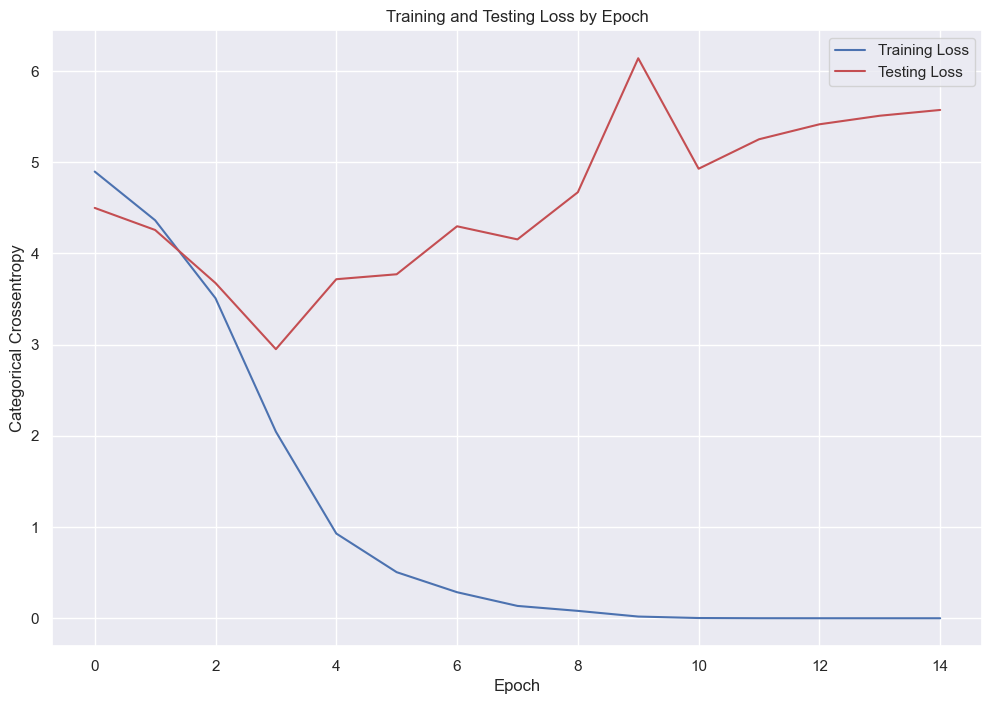

In [28]:
train_loss = hist.history['loss']
test_loss = hist.history['val_loss']
plt.figure(figsize=(12, 8))

plt.plot(train_loss, label='Training Loss', color='b')
plt.plot(test_loss, label='Testing Loss', color='r')
plt.title('Training and Testing Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Categorical Crossentropy')
plt.legend()

# plt.savefig('hist_train_test_loss.png')

We see that the plot of the training loss conitnues to decrease with experience, which shows that the training set is representative. However, we see that the testing loss decreases to a point at around epoch 4 and beign increasing again. This suggests that overfitting has occured, and at epoch 4, the training should have been halted as experience after that showd the dynamics of overfitting.

Alternatively, we could have implemented a `EarlyStopping` callback function using `keras` API, that stops the training of the model when the test loss has increased. This would have saved us tremendous time as we do not have wait for all the epochs to be completed and also save the need of re-running the model. In lieu of time constraint, we noted this approach and would implement this in future projects involving the implementation of CNNs using `keras`.

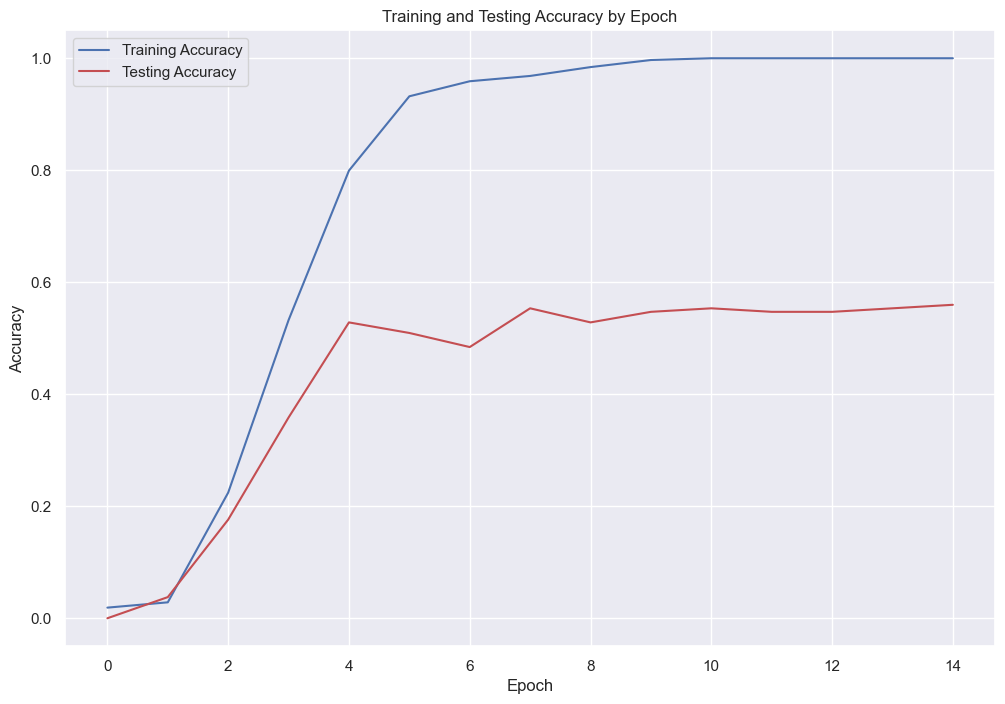

In [29]:
train_loss = hist.history['accuracy']
test_loss = hist.history['val_accuracy']
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training Accuracy', color='b')
plt.plot(test_loss, label='Testing Accuracy', color='r')
plt.title('Training and Testing Accuracy by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# plt.savefig('hist_train_test_accuracy.png')

We see that our testing accuracy **stagnates** around 55% at around the 5th epoch, which also suggests the possibility of overfitting, as train accuracy continues to improve and get infinitely close to 100%, while the test accuracy remains about the same, suggesting that learning beyond that is pointless

In [5]:
model = keras.models.load_model('hist_model.keras')

## **Confusion Matrix**

To give a visual representation of the performance, we plotted the confusion matrix. Note that we need to convert the one-hot encoded labels back to the discrete form, and this is done by calling `numpy`'s `.argmax()` method. 

Each class is represented by the integer number ranging from 0 to 87. True positives are reflected by the colouring along the diagonal, and any wrong predictions are else where.

5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step


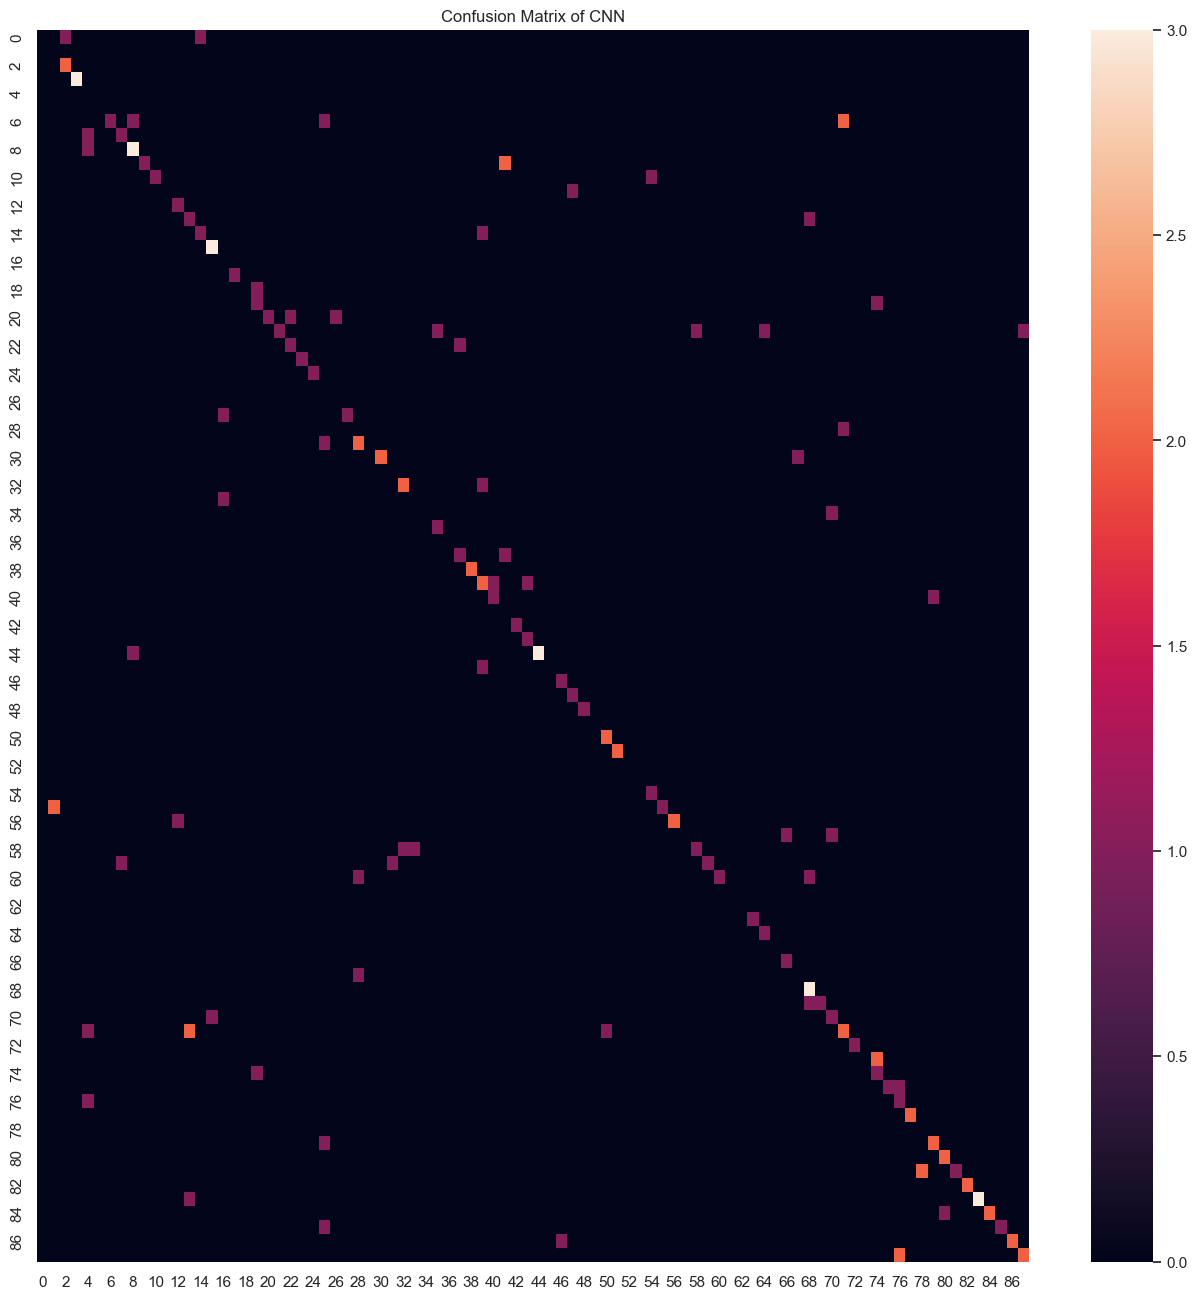

In [18]:
from sklearn.metrics import confusion_matrix

predictions_one_hot = model.predict(X_test_norm)
actual_one_hot = y_test_encoded

predictions_categorical = np.argmax(predictions_one_hot, axis=1)
actual_categorical = np.argmax(actual_one_hot, axis=1)

conf_matrix = confusion_matrix(actual_categorical, predictions_categorical, labels=[i for i in range(88)])

f = plt.figure(figsize=(16, 16))

sns.heatmap(conf_matrix, fmt='d')

plt.title("Confusion Matrix of CNN")
# plt.savefig("confusion_matrix_cnn.png")

## **Score Metrics**

Here, we give numerical representation of the model's performance. These values are calculated based on the `True Positive`, `True Negative`, `False Positive` and `False Negative`.

- **Accuracy**: accuracy measures how many correct predictions are made out of the total predictions. It is given by
<center>$\frac{True Negatives + True Positives}{True Positives + False Positive + True Negative + False Negative}$</center>  

- **Precision**: precision measures how well the model predicts **positives**. It is given by
<center>$\frac{True Positive}{True Positive + False Positive}$</center>
In our context, a low precision would mean that bird species B, C are likely to be identified as bird species A.   

- **Recall**: recall measures how well the model predicts all **possible** psoitive observations. It is essentially the True Positive Rate, and is given by 
<center>$\frac{TruePositive}{TruePositive + FalseNegative}$</center>
In our context, a low recall would mean that a potential bird species A is likely to be classified as species other than A.  

- **F1**: F1 score essentially takes the weighted average of the precision and reecall, and focus on false negatives and false positives. It is given by
<center>$2*\frac{precision*recall}{precision+recall}$</center>


In [24]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

print(f'Test Accuracy score =  {100*accuracy_score(actual_categorical, predictions_categorical):.2f}%') 
print(f'Test Precision score =  {100*precision_score(actual_categorical, predictions_categorical, average="macro"):.2f}%')
print(f'Test Recall score =  {100*recall_score(actual_categorical, predictions_categorical, average="macro"):.2f}%')
print(f'Test Set F1 score score =  {100*f1_score(actual_categorical, predictions_categorical, average="macro"):.2f}%')

Test Accuracy score =  55.97%
Test Precision score =  57.58%
Test Recall score =  53.52%
Test Set F-score score =  51.56%


As mentioned in the `EDA.ipynb`, we will be more cerned about False Negatives, and hence **Recall**, as it is more severe if we failed to identify a particular species of interest, say an endangered species, in the classifications. Hence, an ideal model would aim to improve the precision score.

# **Discussion**

Given that we have **88** classes, and few samples **792**, the result seemed decent although there is a clear sign of overfitting. While we did not have the time and computational resources to continue testing, we have some ideas on how we can improve the model's performance.

## **Tuning of Parameters**

We have mentioned a lot of times that the hyperparameters such as the number of nodes used in each layer, is completely arbitrary. In this case where we got an overfit, it may be possible that we have specified too many parameters, and we can manually scale down the layers. Alternatively, we can explore possible libraries that implement potential grid search functions for us and test out all of the possibilities, although this would likely lead to exponential time complexity.

## **Number of Epochs**

We have mentioned previously about how we could have impleneted an `EarlyStop` callback function using `keras` API to stop training once the monitored metrics surpassed a certain threshold.

## **Size of Dataset**
While we have dramatically increased our dataset through image augmentation, it is a consensus that the model will learn better from more data and hence improving accuracy. It is common for models to be trained with tens or even hundreds of thousands of data point, and for our case which is less than a thousand, there is a potential that the model may not learn anything meaningful and lead to overfitting. The increase in data size can either be done with more augmentation, or through manually increasing the number of dataset from exisitng birdsong databases.

## **Feature Used**
Although Mel Spectrograms, MFCC, i.e. those in the time-frequency domains remain a popular choice based on the current literature, there are currently many attempts in integrating different domains together, particularly, through a multi-modal approach. In the future, our team can look into this as well and see how the performance will change.

# **Conclusion**

In this small, exploratory project, our team has learned how to deal with unstructured data such as audio data. Specifically, we learnt how audio data is being representend, and how its different features can be extracted. Additionally, we also learnt how to process these audio data to standardise their data shape and also to reduce the background noise. 

We learnt how multi-class classification can be done and the importance of having sufficient member size in each class so as to increase accuracy. We learnt how to work with limited data by applying some simple image augmentation technique to increase our data size.

Finally, we learnt the basics of neural networks and compiled an unrefined CNN and achieved decent results, though with clear sign of overfitting. We reflected on what are the possible steps that we can to do to tune this model for higher accuracy, if given more time and computational resources.